In [88]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json

Naughts (Opening Move Analysis)

In [96]:
filepath = f"../ai/models/naughts/naughts_gen10.json"
with open(filepath, "r") as file:
    model = json.load(file)

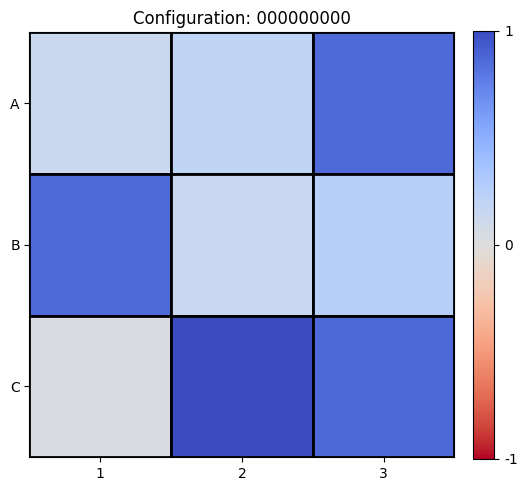

In [98]:
board = np.zeros((3, 3))
opening_config = '000000000'

# Collect all values to calculate the maximum absolute value
all_values = []
for value in model[opening_config].values():
    all_values.append(abs(float(value)))

# Calculate the maximum absolute value
max_abs_value = max(all_values)

for key, value in model[opening_config].items():
    coordinates = [int(coord) for coord in key.strip('][').split(', ')]
    board[coordinates[0], coordinates[1]] = float(value) / max_abs_value


plt.figure(figsize=(6, 6))

for m in range(3):
    for n in range(3):
        color = plt.cm.coolwarm_r((board[m, n] + 1) / 2) 
        rect = patches.Rectangle((n - 0.5, m - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
        plt.gca().add_patch(rect)

plt.title(f'Configuration: {opening_config}')
plt.xticks([0, 1, 2], ['1', '2', '3'])
plt.yticks([0, 1, 2], ['A', 'B', 'C'])

# Add color bar (optional)
cbar = plt.colorbar(plt.imshow(board, cmap='coolwarm_r', vmin=-1, vmax=1), fraction=0.046, pad=0.04, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['-1', '0', '1'])  

# Show plot
plt.show()


Crosses (Opening Defense Analysis)

In [91]:
filepath = f"../ai/models/crosses/crosses_gen10.json"
with open(filepath, "r") as file:
    model = json.load(file)

If opponent opens in corner

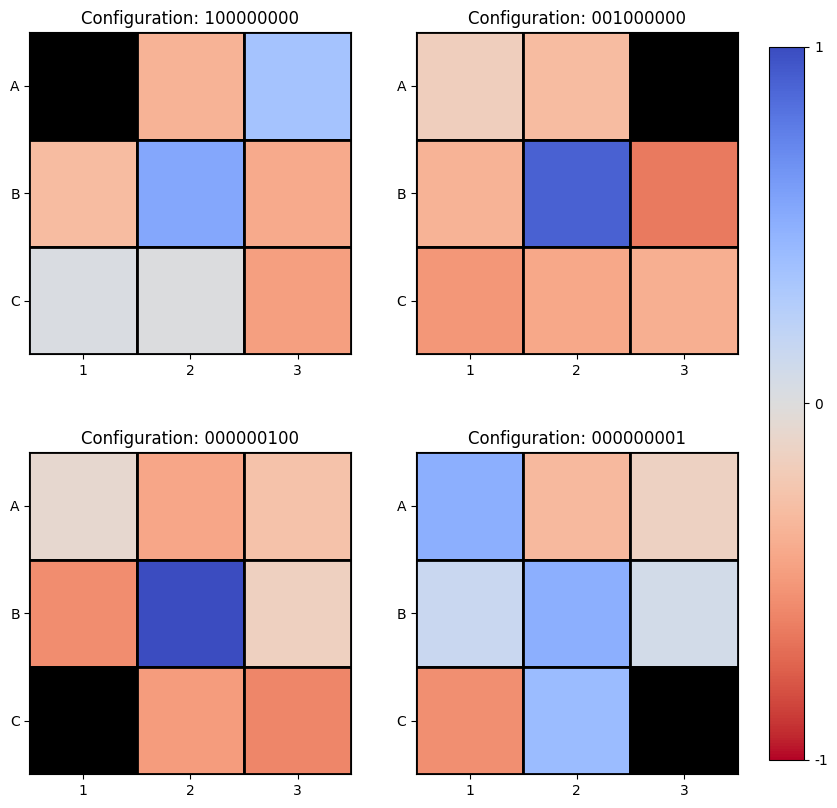

In [92]:
corner_board_configs = [['100000000', (0,0)], 
                        ['001000000', (0,2)], 
                        ['000000100', (2,0)], 
                        ['000000001', (2,2)]]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Collect all values to calculate the maximum absolute value
all_values = []
for config in corner_board_configs:
    for value in model[config[0]].values():
        all_values.append(abs(float(value)))

# Calculate the maximum absolute value
max_abs_value = max(all_values)

for ax, config in zip(axs.ravel(), corner_board_configs):
    board = np.zeros((3, 3))
    for key, value in model[config[0]].items():
        coordinates = [int(coord) for coord in key.strip('][').split(', ')]
        board[coordinates[0], coordinates[1]] = float(value) / max_abs_value #Normalizes to range -1, 1

    
    # Plot the Tic Tac Toe board
    im = ax.imshow(board, cmap='coolwarm_r', interpolation='nearest', vmin=-1, vmax=1)
    ax.set_title(f'Configuration: {config[0]}')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['1', '2', '3'])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['A', 'B', 'C'])

    # Draw rectangle patches around each cell
    for m in range(3):
        for n in range(3):
            if (m,n) == config[1]:
                color = 'black'
            else:
                color = plt.cm.coolwarm_r((board[m, n] + 1) / 2) 
            rect = patches.Rectangle((n - 0.5, m - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

cbar = fig.colorbar(im, ax=axs, fraction=0.046, pad=0.04, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['-1', '0', '1'])  

plt.show()

If opponent opens in outside non-corner

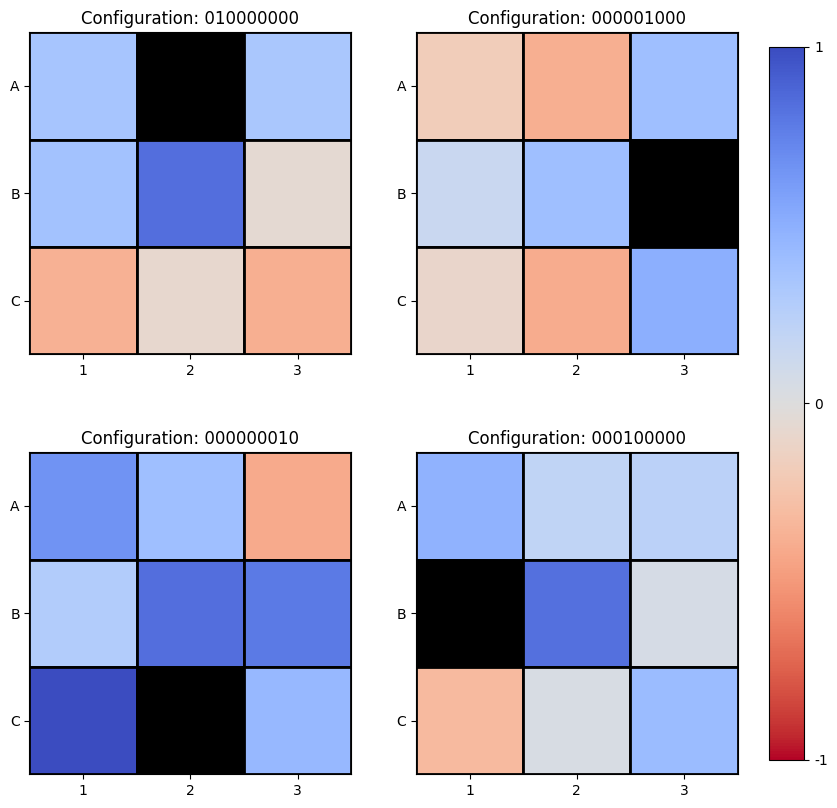

In [93]:
non_corner_configs = [['010000000',(0,1)], 
                      ['000001000',(1,2)], 
                      ['000000010',(2,1)], 
                      ['000100000',(1,0)]]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Collect all values to calculate the maximum absolute value
all_values = []
for config in non_corner_configs:
    for value in model[config[0]].values():
        all_values.append(abs(float(value)))

# Calculate the maximum absolute value
max_abs_value = max(all_values)

for ax, config in zip(axs.ravel(), non_corner_configs):
    board = np.zeros((3, 3))
    for key, value in model[config[0]].items():
        coordinates = [int(coord) for coord in key.strip('][').split(', ')]
        board[coordinates[0], coordinates[1]] = float(value) / max_abs_value #Normalizes to range -1, 1

    
    # Plot the Tic Tac Toe board
    im = ax.imshow(board, cmap='coolwarm_r', interpolation='nearest', vmin=-1, vmax=1)
    ax.set_title(f'Configuration: {config[0]}')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['1', '2', '3'])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['A', 'B', 'C'])

    # Draw rectangle patches around each cell
    for m in range(3):
        for n in range(3):
            if (m,n) == config[1]:
                color = 'black'
            else:
                color = plt.cm.coolwarm_r((board[m, n] + 1) / 2) 
            rect = patches.Rectangle((n - 0.5, m - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

cbar = fig.colorbar(im, ax=axs, fraction=0.046, pad=0.04, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['-1', '0', '1'])  

plt.show()

If opponent opens in centre

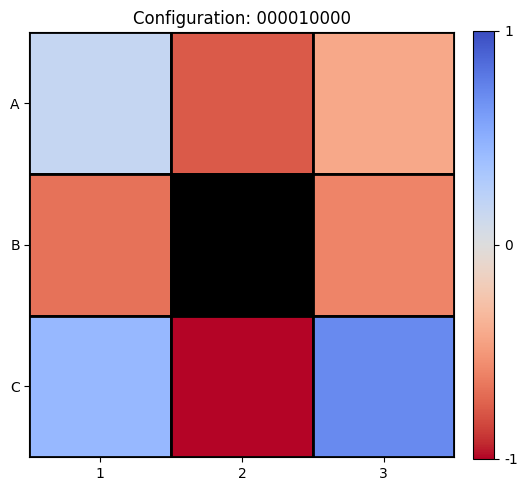

In [94]:
board = np.zeros((3, 3))
centre_config = '000010000'

# Collect all values to calculate the maximum absolute value
all_values = []
for value in model[centre_config].values():
    all_values.append(abs(float(value)))

# Calculate the maximum absolute value
max_abs_value = max(all_values)

for key, value in model[centre_config].items():
    coordinates = [int(coord) for coord in key.strip('][').split(', ')]
    board[coordinates[0], coordinates[1]] = float(value) / max_abs_value

black_cell_coordinate = (1, 1)  # centre co-ordinate

plt.figure(figsize=(6, 6))

for m in range(3):
    for n in range(3):
        if (m, n) == black_cell_coordinate:
            color = 'black'  
        else:
            color = plt.cm.coolwarm_r((board[m, n] + 1) / 2) 

        rect = patches.Rectangle((m - 0.5, n - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
        plt.gca().add_patch(rect)

plt.title(f'Configuration: {centre_config}')
plt.xticks([0, 1, 2], ['1', '2', '3'])
plt.yticks([0, 1, 2], ['A', 'B', 'C'])

# Add color bar (optional)
cbar = plt.colorbar(plt.imshow(board, cmap='coolwarm_r', vmin=-1, vmax=1), fraction=0.046, pad=0.04, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['-1', '0', '1'])  

# Show plot
plt.show()
